In [1]:
import numpy as np 
import lightkurve as lk
from matplotlib import pyplot as plt
from astropy import units as u
%matplotlib inline

In [2]:
search_result = lk.search_lightcurve('GJ 1243', author='Kepler')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr009726699,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr009726699,0.0
2,Kepler Quarter 02,2009,Kepler,1800,kplr009726699,0.0
3,Kepler Quarter 03,2009,Kepler,1800,kplr009726699,0.0
4,Kepler Quarter 06,2010,Kepler,60,kplr009726699,0.0
5,Kepler Quarter 06,2010,Kepler,60,kplr009726699,0.0
6,Kepler Quarter 04,2010,Kepler,1800,kplr009726699,0.0
7,Kepler Quarter 05,2010,Kepler,1800,kplr009726699,0.0
8,Kepler Quarter 06,2010,Kepler,1800,kplr009726699,0.0


In [3]:
search_result_q1 = lk.search_lightcurve('GJ 1243', author='Kepler', quarter=1)
search_result_q1

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr009726699,0.0


In [4]:
lc1 = search_result_q1.download()

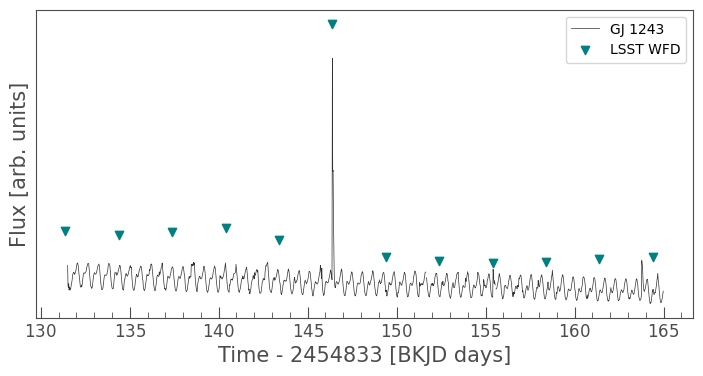

In [5]:
lc1.plot(label='GJ 1243')

maxtime = lc1.time.bkjd[lc1.flux == lc1.flux.max()]

bound = 15

plt.scatter(maxtime + np.arange(-bound,bound+6,3), lc1.flux[[np.argmin(np.abs(lc1.time.bkjd - time)).min() for time in (maxtime + np.arange(-bound,bound+6,3))]] + 10000 * u.electron / u.s, color='teal', marker = 'v', label='LSST WFD')

plt.ylabel('Flux [arb. units]')
plt.yticks([])
plt.legend()
plt.savefig('/Users/riley/Desktop/RAFTS/Figures/candencefig.png', dpi=300, bbox_inches='tight')

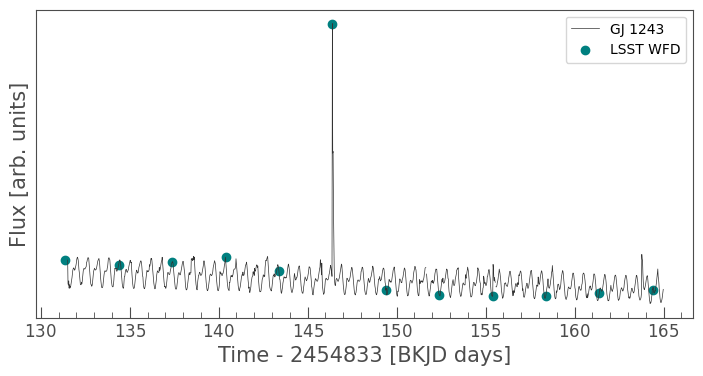

In [6]:
lc1.plot(label='GJ 1243')

maxtime = lc1.time.bkjd[lc1.flux == lc1.flux.max()]

bound = 15

plt.scatter(maxtime + np.arange(-bound,bound+6,3), lc1.flux[[np.argmin(np.abs(lc1.time.bkjd - time)).min() for time in (maxtime + np.arange(-bound,bound+6,3))]], color='teal', marker = 'o', label='LSST WFD')

plt.ylabel('Flux [arb. units]')
plt.yticks([])
plt.legend()

In [7]:
import pandas as pd

data = pd.read_pickle('/Users/riley/Desktop/RAFTS/lsst_RRLyr.pkl')

In [8]:
data.head()

,band,ccdVisitId,coord_ra,coord_dec,objectId,psfFlux,psfFluxErr,psfMag,ccdVisitId2,band2,expMidptMJD,zeroPoint
0,y,1032263018,62.462569,-44.11336,1251384969897480052,-515.183603,1697.218490,NaN,1032263018,y,61100.069706,30.602301
1,y,1033987172,62.462569,-44.11336,1251384969897480052,3151.738459,1686.955775,22.653625,1033987172,y,61102.068464,30.606100
2,u,675163080,62.462569,-44.11336,1251384969897480052,183.449123,209.242045,25.741211,675163080,u,60582.247144,30.469101
3,y,443055067,62.462569,-44.11336,1251384969897480052,-704.848327,1624.400086,NaN,443055067,y,60215.203585,30.612801
4,u,466722002,62.462569,-44.11336,1251384969897480052,382.472233,278.926670,24.943500,466722002,u,60261.078221,30.461201


In [9]:
data.shape

(11177, 12)

In [10]:
plot_filter_labels = ["u", "g", "r", "i", "z", "y"]
plot_filter_colors = {"u": "#56b4e9", "g": "#008060", "r": "#ff4000",  "i":"#850000","z": "#6600cc","y": "#000000"}
plot_filter_symbols = {"u":"o","g":"^","r":"v","i":"s","z":"*","y": "p"}

In [11]:
ids = data["objectId"].unique()
ids

array([1251384969897480052, 1251745609711384492, 1252299763571782414,
       1251604872223041749, 1327638300307004563, 1329353538446317664,
       1327400805795401837, 1405624461041897445, 1408219308483446461,
       1569135034231724627, 1567428592185416026, 1566258711813454641,
       1651589610221899038, 1736726994583845484, 1736208025095542267,
       1651510445384705236, 1824520799038501324, 1913889104144142393,
       1910977597353791985, 1998718625250325973, 2003099079575369656,
       2090857699657944782, 2093945128308742270, 2183075938902767275,
       2185793931646635508])

/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/2762016462.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data["objectId"] == ids[0]][data['band'] == filter].plot(x='expMidptMJD', y='psfMag', kind='scatter', color = plot_filter_colors[filter], marker=plot_filter_symbols[filter], label=filter, ax=ax)


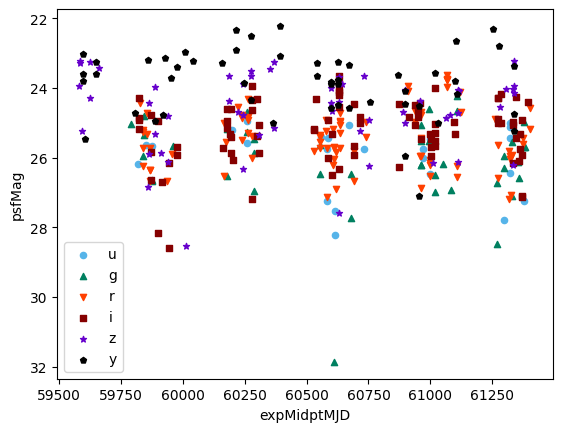

In [12]:
fig, ax = plt.subplots()

for filter in plot_filter_labels:

    data[data["objectId"] == ids[0]][data['band'] == filter].plot(x='expMidptMJD', y='psfMag', kind='scatter', color = plot_filter_colors[filter], marker=plot_filter_symbols[filter], label=filter, ax=ax)
    plt.legend()

plt.gca().invert_yaxis()

/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/3863058054.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data["objectId"] == ids[0]][data['band'] == filter].plot(x='expMidptMJD', y='psfMag', kind='scatter', color = plot_filter_colors[filter], marker=plot_filter_symbols[filter], label=filter, ax=ax)


(60000.0, 60260.0)

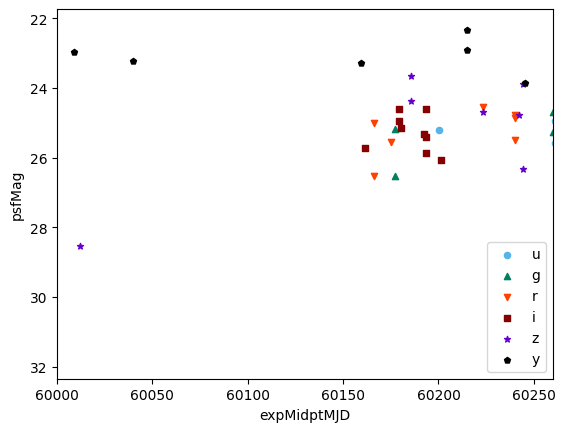

In [13]:
fig, ax = plt.subplots()

for filter in plot_filter_labels:

    data[data["objectId"] == ids[0]][data['band'] == filter].plot(x='expMidptMJD', y='psfMag', kind='scatter', color = plot_filter_colors[filter], marker=plot_filter_symbols[filter], label=filter, ax=ax)
    plt.legend()

plt.gca().invert_yaxis()
plt.xlim(60000, 60260)

In [14]:
np.where(data[data["objectId"] == ids[0]][data['band'] == 'g']['psfMag'] == data[data["objectId"] == ids[0]][data['band'] == 'g']['psfMag'].max())[0][0]

/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/3813566048.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.where(data[data["objectId"] == ids[0]][data['band'] == 'g']['psfMag'] == data[data["objectId"] == ids[0]][data['band'] == 'g']['psfMag'].max())[0][0]


36

In [15]:
midpt = data[data["objectId"] == ids[0]][data['band'] == 'g']['expMidptMJD'].iloc[36]

/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/2205074819.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  midpt = data[data["objectId"] == ids[0]][data['band'] == 'g']['expMidptMJD'].iloc[36]


/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/2661369868.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  time = data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'].where((data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] > midpt - (lc1.time.bkjd.max() - lc1.time.bkjd.min())/2) *\
/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/2661369868.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] < midpt + (lc1.time.bkjd.max() - lc1.time.bkjd.min())/2))
/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/2661369868.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mag = data[data["objectId"] == ids[0]][data['band'] == filter]['psfMag'].where((data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] > midpt - (lc1.time

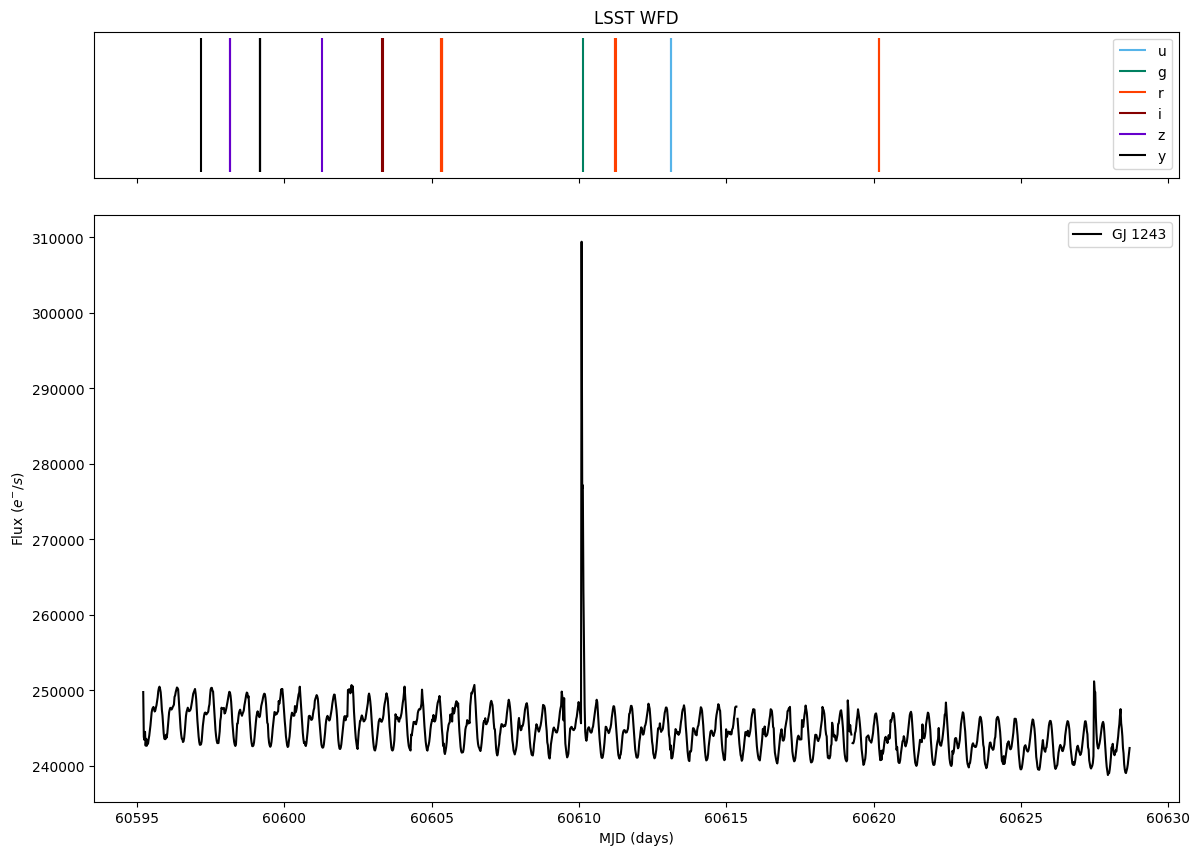

In [16]:
fig, ax = plt.subplots(2,1,figsize=(14,10), gridspec_kw={'height_ratios': [1, 4], 'hspace': 0.1}, sharex=True)

for filter in plot_filter_labels:

    time = data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'].where((data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] > midpt - (lc1.time.bkjd.max() - lc1.time.bkjd.min())/2) *\
                                                                                         (data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] < midpt + (lc1.time.bkjd.max() - lc1.time.bkjd.min())/2))
    mag = data[data["objectId"] == ids[0]][data['band'] == filter]['psfMag'].where((data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] > midpt - (lc1.time.bkjd.max() - lc1.time.bkjd.min())/2) *\
                                                                                         (data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] < midpt + (lc1.time.bkjd.max() - lc1.time.bkjd.min())/2))
    ax[0].vlines(time, 0, 1, color=plot_filter_colors[filter], label=filter)
    ax[0].set_yticks([])
    ax[0].legend()

ax[0].set_title('LSST WFD')

ax[1].plot(lc1.time.mjd + 5631.2, lc1.flux, c='k', label='GJ 1243')
ax[1].set_xlabel('MJD (days)')
ax[1].set_ylabel(r'Flux ($e^{-}/s$)')
ax[1].legend()


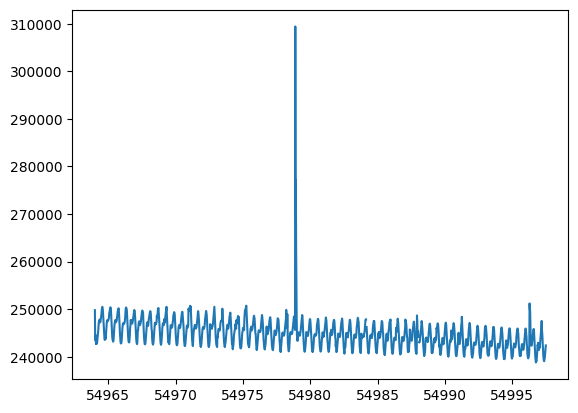

In [17]:
plt.plot(lc1.time.mjd, lc1.flux)

/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/3010719994.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data["objectId"] == ids[0]][data['band'] == filter].plot(x='expMidptMJD', y='psfMag', kind='scatter', color = plot_filter_colors[filter], marker=plot_filter_symbols[filter], label=filter, ax=ax)


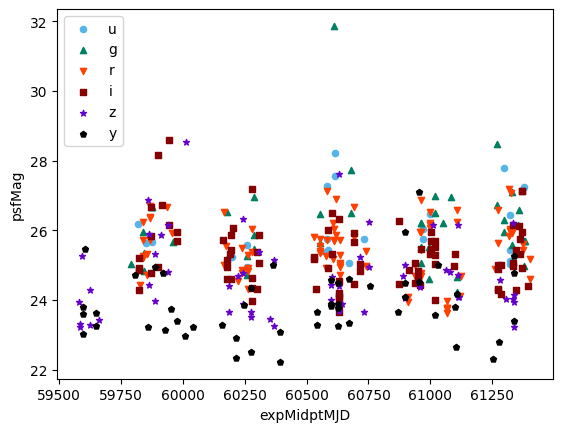

In [18]:
fig, ax = plt.subplots(1)

for filter in plot_filter_labels:

    data[data["objectId"] == ids[0]][data['band'] == filter].plot(x='expMidptMJD', y='psfMag', kind='scatter', color = plot_filter_colors[filter], marker=plot_filter_symbols[filter], label=filter, ax=ax)
    plt.legend()

/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/982207763.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data["objectId"] == ids[0]][data['band'] == 'g'].plot(x='expMidptMJD', y='psfMag', kind='scatter', color = plot_filter_colors['g'], marker=plot_filter_symbols['g'])


<AxesSubplot: xlabel='expMidptMJD', ylabel='psfMag'>

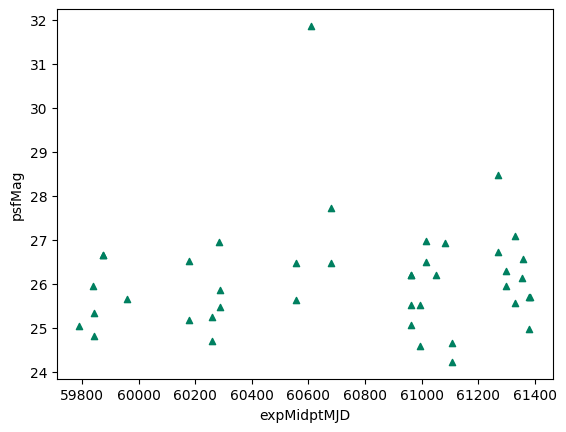

In [19]:
data[data["objectId"] == ids[0]][data['band'] == 'g'].plot(x='expMidptMJD', y='psfMag', kind='scatter', color = plot_filter_colors['g'], marker=plot_filter_symbols['g'])

/Users/riley/Desktop/RAFTS/venv/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<AxesSubplot: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

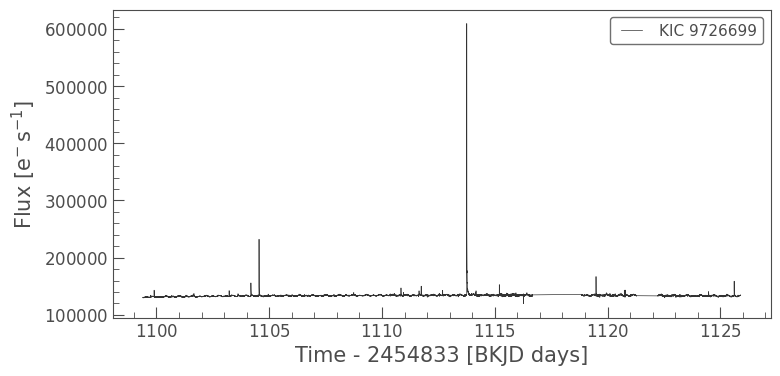

In [20]:
search_result_q = lk.search_lightcurve('GJ 1243', author='Kepler', quarter=12)
lc = search_result_q.download()
lc.plot()

(1113.0, 1114.0)

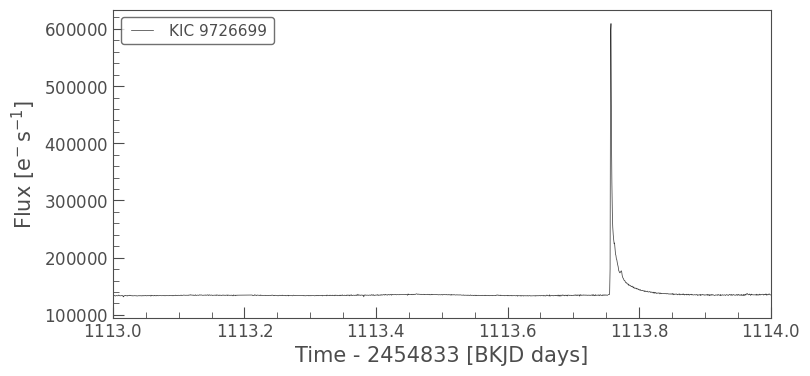

In [21]:
lc.plot()
plt.xlim(1113, 1114)

/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/3508919846.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  time = data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'].where((data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] > midpt - (lc.time.bkjd.max() - lc.time.bkjd.min())/2) *\
/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/3508919846.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] < midpt + (lc.time.bkjd.max() - lc.time.bkjd.min())/2))
/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/3508919846.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mag = data[data["objectId"] == ids[0]][data['band'] == filter]['psfMag'].where((data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] > midpt - (lc.time.bkjd

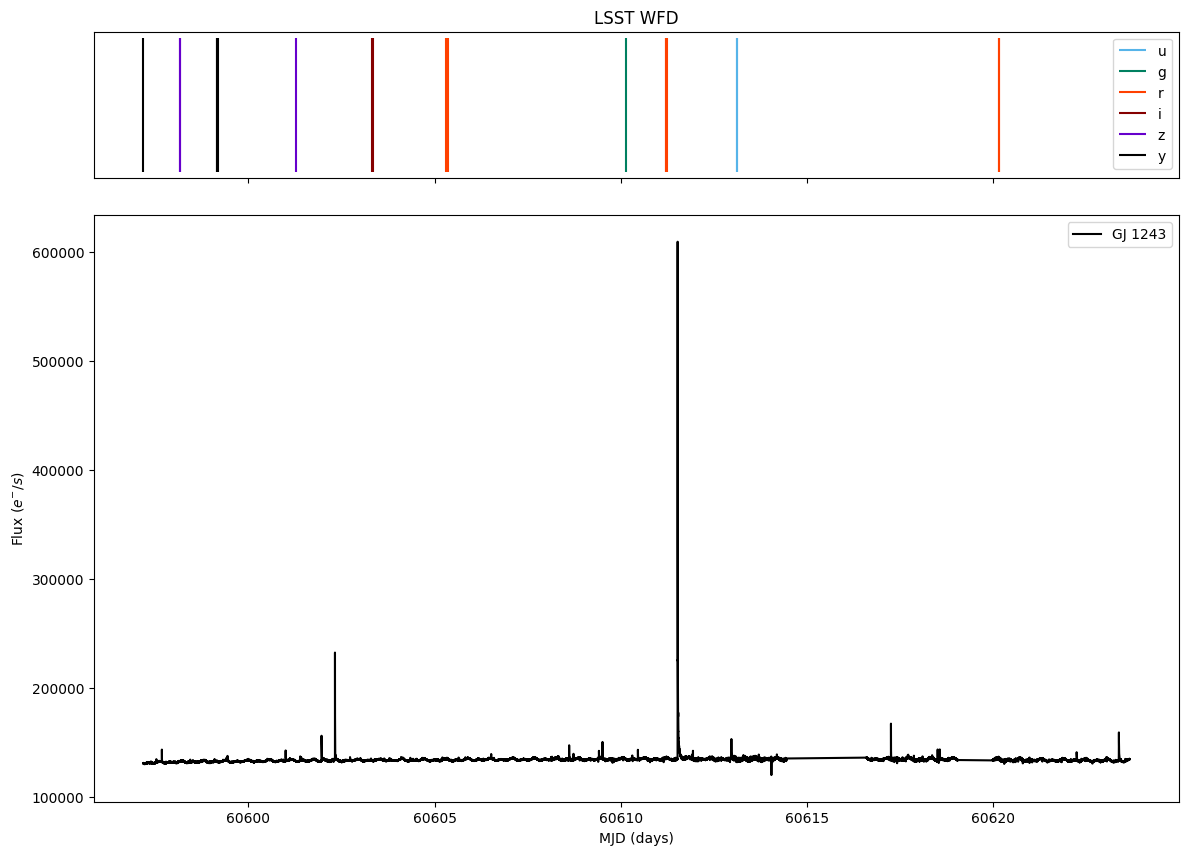

In [22]:
fig, ax = plt.subplots(2,1,figsize=(14,10), gridspec_kw={'height_ratios': [1, 4], 'hspace': 0.1}, sharex=True)
times = []
for filter in plot_filter_labels:

    time = data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'].where((data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] > midpt - (lc.time.bkjd.max() - lc.time.bkjd.min())/2) *\
                                                                                         (data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] < midpt + (lc.time.bkjd.max() - lc.time.bkjd.min())/2))
    times.append(time.values)
    mag = data[data["objectId"] == ids[0]][data['band'] == filter]['psfMag'].where((data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] > midpt - (lc.time.bkjd.max() - lc.time.bkjd.min())/2) *\
                                                                                         (data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] < midpt + (lc.time.bkjd.max() - lc.time.bkjd.min())/2))
    ax[0].vlines(time, 0, 1, color=plot_filter_colors[filter], label=filter)
    ax[0].set_yticks([])
    ax[0].legend()

n = []
for t in times:
    n.append(np.nanmin(t))

ax[0].set_title('LSST WFD')

ax[1].plot(lc.time.mjd + (np.min(n) - lc.time.mjd.min()), lc.flux, c='k', label='GJ 1243')
ax[1].set_xlabel('MJD (days)')
ax[1].set_ylabel(r'Flux ($e^{-}/s$)')
ax[1].legend()

/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/3482027643.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  time = data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'].where((data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] > midpt - (lc.time.bkjd.max() - lc.time.bkjd.min())/2) *\
/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/3482027643.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] < midpt + (lc.time.bkjd.max() - lc.time.bkjd.min())/2))
/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/3482027643.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mag = data[data["objectId"] == ids[0]][data['band'] == filter]['psfMag'].where((data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] > midpt - (lc.time.bkjd

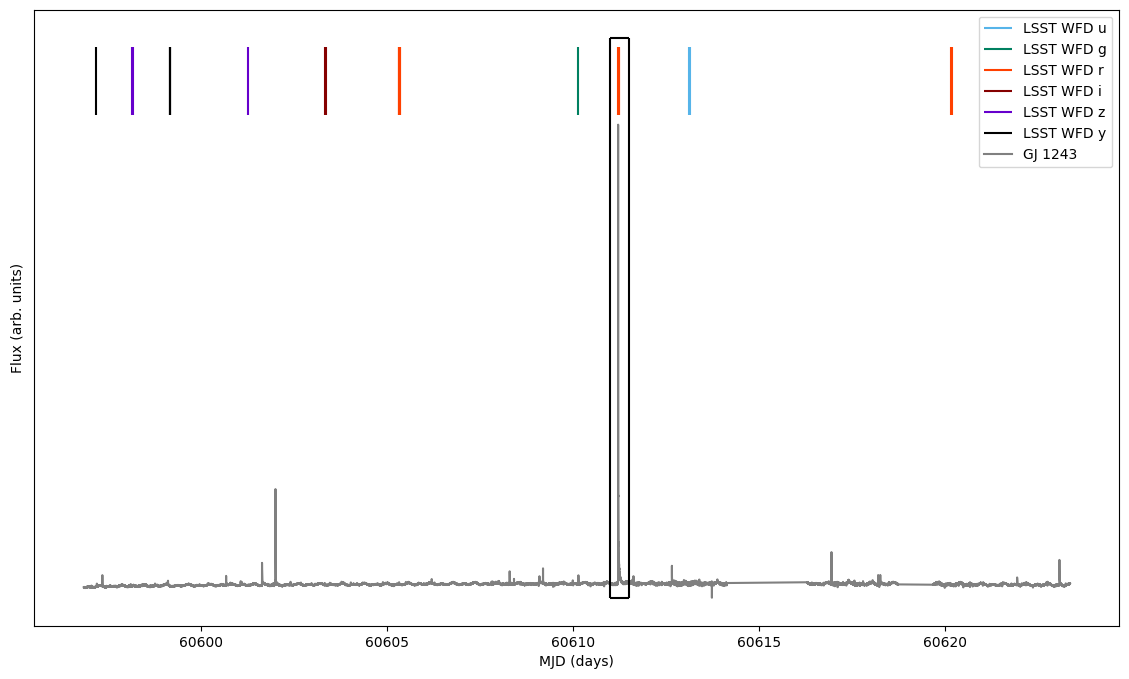

In [23]:
fig, ax = plt.subplots(1, figsize=(14,8))
times = []
for filter in plot_filter_labels:

    time = data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'].where((data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] > midpt - (lc.time.bkjd.max() - lc.time.bkjd.min())/2) *\
                                                                                         (data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] < midpt + (lc.time.bkjd.max() - lc.time.bkjd.min())/2))
    times.append(time.values)
    mag = data[data["objectId"] == ids[0]][data['band'] == filter]['psfMag'].where((data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] > midpt - (lc.time.bkjd.max() - lc.time.bkjd.min())/2) *\
                                                                                         (data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] < midpt + (lc.time.bkjd.max() - lc.time.bkjd.min())/2))
    ax.vlines(time, lc.flux.max().value + 10000, lc.flux.max().value + 80000, color=plot_filter_colors[filter], label='LSST WFD {}'.format(filter))
    ax.set_yticks([])
    ax.legend()

n = []
for t in times:
    n.append(np.nanmin(t))

ax.plot(lc.time.mjd + (np.min(n) - lc.time.mjd.min()) - 0.322, lc.flux, c='grey', label='GJ 1243')
ax.hlines([lc.flux.min().value, lc.flux.max().value + 90000], 60611, 60611.5, color='k')
ax.vlines([60611, 60611.5], lc.flux.min().value, lc.flux.max().value + 90000, color='k')
ax.set_xlabel('MJD (days)')
ax.set_ylabel(r'Flux (arb. units)')
ax.legend()

plt.savefig('/Users/riley/Desktop/RAFTS/Figures/candencefig.png', dpi=300, bbox_inches='tight')

/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/1848668487.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  time = data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'].where((data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] > midpt - (lc.time.bkjd.max() - lc.time.bkjd.min())/2) *\
/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/1848668487.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] < midpt + (lc.time.bkjd.max() - lc.time.bkjd.min())/2))
/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/1848668487.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mag = data[data["objectId"] == ids[0]][data['band'] == filter]['psfMag'].where((data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] > midpt - (lc.time.bkjd

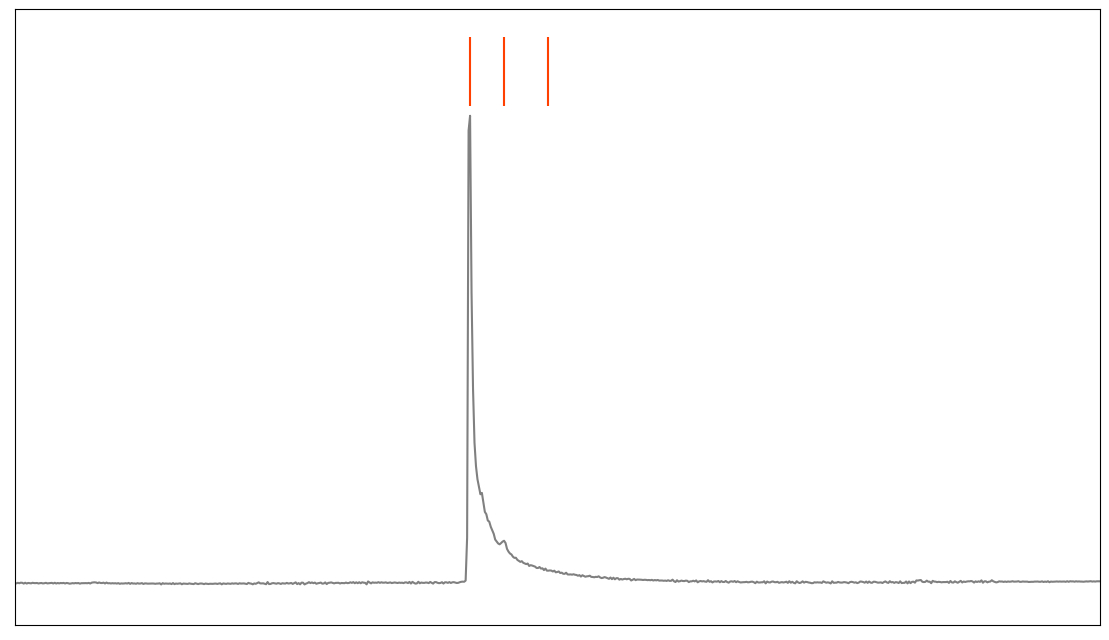

In [24]:
fig, ax = plt.subplots(1, figsize=(14,8))
times = []
for filter in plot_filter_labels:

    time = data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'].where((data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] > midpt - (lc.time.bkjd.max() - lc.time.bkjd.min())/2) *\
                                                                                         (data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] < midpt + (lc.time.bkjd.max() - lc.time.bkjd.min())/2))
    times.append(time.values)
    mag = data[data["objectId"] == ids[0]][data['band'] == filter]['psfMag'].where((data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] > midpt - (lc.time.bkjd.max() - lc.time.bkjd.min())/2) *\
                                                                                         (data[data["objectId"] == ids[0]][data['band'] == filter]['expMidptMJD'] < midpt + (lc.time.bkjd.max() - lc.time.bkjd.min())/2))
    ax.vlines(time, lc.flux.max().value + 10000, lc.flux.max().value + 80000, color=plot_filter_colors[filter])
    ax.set_yticks([])

n = []
for t in times:
    n.append(np.nanmin(t))

ax.plot(lc.time.mjd + (np.min(n) - lc.time.mjd.min())-0.322, lc.flux, c='grey')
ax.set_xlim(60611, 60611.5)
ax.set_xticks([])
plt.savefig('/Users/riley/Desktop/RAFTS/Figures/candencefig1.png', dpi=300, bbox_inches='tight')

Adding DDF data

In [25]:
def readdata(path=None, root=None):
    if root is None:
        root = path["path"]
    try:
        data = pd.read_csv(root + path["data"])
        metadata = pd.read_csv(root + "/" + path["metadata"])
    except FileNotFoundError:
        data = pd.read_csv("../" + root + path["data"])
        metadata = pd.read_csv("../" + root + "/" + path["metadata"])

    return data, metadata

In [26]:
data, dataMETA = readdata(path={"path": "./",
                                    "data":"plasticc_train_lightcurves.csv.gz",
                                    "metadata":"plasticc_train_metadata.csv.gz"})

In [27]:
data.head()

,object_id,mjd,passband,flux,flux_err,detected_bool
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [28]:
dataMETA.head()

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,92,...,0.0,0.0,59570.000,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,88,...,0.0,0.0,59570.000,34,108.7,117.7,119.9,149.6,147.9,150.5
2,730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,42,...,0.0,0.0,60444.379,9,0.0,0.0,0.0,0.0,0.0,0.0
3,745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,90,...,0.0,0.0,60130.453,38,0.0,0.0,0.0,0.0,0.0,0.0
4,1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,90,...,0.0,0.0,60452.641,1,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
dataMETA[dataMETA['ddf_bool'] == 0].head()

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
2116,1019335,85.6055,-30.6916,0,0.862,0.847,0.025,43.654,0.024,90,...,0.0,0.000,60635.227,38506,0.0,0.0,0.0,0.0,0.0,0.0
2117,1091307,145.0195,-9.2916,0,0.330,0.388,0.290,41.605,0.041,52,...,0.0,0.000,59719.711,29656,0.0,0.0,0.0,0.0,0.0,0.0
2118,1107992,310.0781,-20.9020,0,0.143,0.050,0.037,36.743,0.035,42,...,0.0,0.000,59726.324,6546,0.0,0.0,0.0,0.0,0.0,0.0
2119,1135496,78.3984,-36.6092,0,0.246,0.267,0.558,40.668,0.033,90,...,0.0,0.000,60655.535,40921,0.0,0.0,0.0,0.0,0.0,0.0
2120,1135692,177.5391,-18.9971,0,0.441,0.452,0.015,42.001,0.037,15,...,3.1,0.158,60186.230,6871,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
dataMETA[dataMETA['ddf_bool'] == 0]['object_id'].iloc[0]

1019335

In [31]:
ddfobj = data[data['object_id'] == dataMETA[dataMETA['ddf_bool'] == 1]['object_id'].iloc[0]]
ddfobjMETA = dataMETA[dataMETA['object_id'] == dataMETA[dataMETA['ddf_bool'] == 1]['object_id'].iloc[0]]

In [32]:
wfdobj = data[data['object_id'] ==  dataMETA[dataMETA['ddf_bool'] == 0]['object_id'].iloc[0]]
wfdobjMETA = dataMETA[dataMETA['object_id'] == dataMETA[dataMETA['ddf_bool'] == 0]['object_id'].iloc[0]]

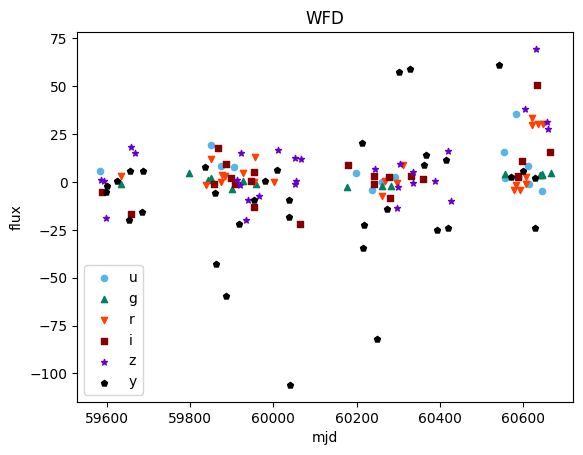

In [33]:
fig, ax = plt.subplots(1)

for i, filter in enumerate(plot_filter_labels):
    wfdobj[wfdobj['passband'] == i].plot(x='mjd', y='flux', kind='scatter', color=plot_filter_colors[filter], label=filter, ax=ax,
                                                                                              marker=plot_filter_symbols[filter])
    ax.set_title('WFD')
    ax.legend()

(array([70., 38., 11.,  4.,  3.,  4.,  4.,  0.,  0.,  1.]),
 array([2.300000e-02, 3.716070e+00, 7.409140e+00, 1.110221e+01,
        1.479528e+01, 1.848835e+01, 2.218142e+01, 2.587449e+01,
        2.956756e+01, 3.326063e+01, 3.695370e+01]),
 <BarContainer object of 10 artists>)

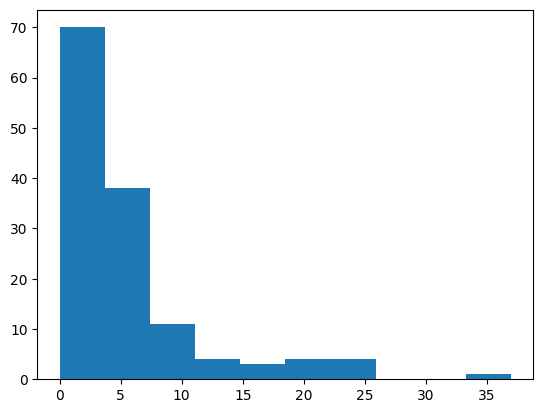

In [34]:
plt.hist(np.diff(wfdobj['mjd'])[np.diff(wfdobj['mjd']) < 100])

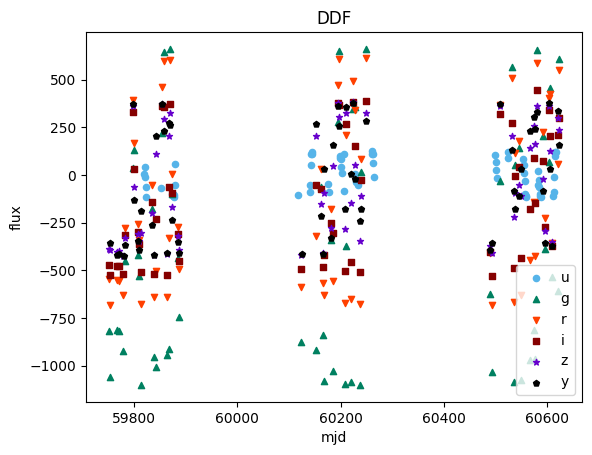

In [35]:
fig, ax = plt.subplots(1)

for i, filter in enumerate(plot_filter_labels):
    ddfobj[ddfobj['passband'] == i].plot(x='mjd', y='flux', kind='scatter', color=plot_filter_colors[filter], label=filter, ax=ax,
                                                                                              marker=plot_filter_symbols[filter])
    ax.set_title('DDF')
    ax.legend()

(array([282.,  33.,   6.,   7.,   7.,   6.,   3.,   1.,   0.,   4.]),
 array([6.700000e-03, 1.599790e+00, 3.192880e+00, 4.785970e+00,
        6.379060e+00, 7.972150e+00, 9.565240e+00, 1.115833e+01,
        1.275142e+01, 1.434451e+01, 1.593760e+01]),
 <BarContainer object of 10 artists>)

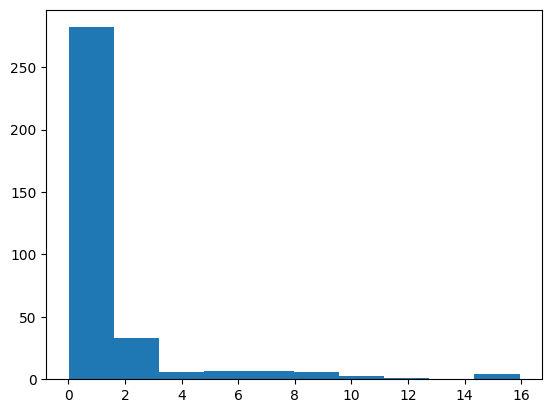

In [36]:
plt.hist(np.diff(ddfobj['mjd'])[np.diff(ddfobj['mjd']) < 100])

In [37]:
.where((ddfobj['mjd'] > midpt - (lc.time.bkjd.max() - lc.time.bkjd.min())/2) * (ddfobj['mjd'] < midpt + (lc.time.bkjd.max() - lc.time.bkjd.min())/2))

SyntaxError: invalid syntax (1333841014.py, line 1)

In [38]:
wfdobj[wfdobj['passband'] == i]['mjd']

691344    59597.0649
691346    59601.0535
691347    59625.1150
691350    59652.0341
691351    59655.0111
691355    59683.9981
691356    59685.9799
691358    59835.3645
691365    59859.2455
691366    59861.2490
691372    59887.1638
691379    59918.0897
691388    59954.0514
691394    59980.1283
691396    60008.1043
691398    60037.0313
691399    60038.0171
691400    60040.0499
691409    60212.2710
691410    60215.2737
691411    60217.2755
691416    60249.2695
691421    60272.1344
691429    60301.0492
691432    60328.1137
691437    60362.0775
691438    60366.1623
691440    60393.0648
691441    60413.9754
691442    60418.9770
691445    60541.3656
691449    60571.3351
691457    60599.2224
691465    60627.1825
691466    60628.1367
Name: mjd, dtype: float64

/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/2259199110.py:15: RuntimeWarning: All-NaN slice encountered
  n.append(np.nanmin(t))
/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/2259199110.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)


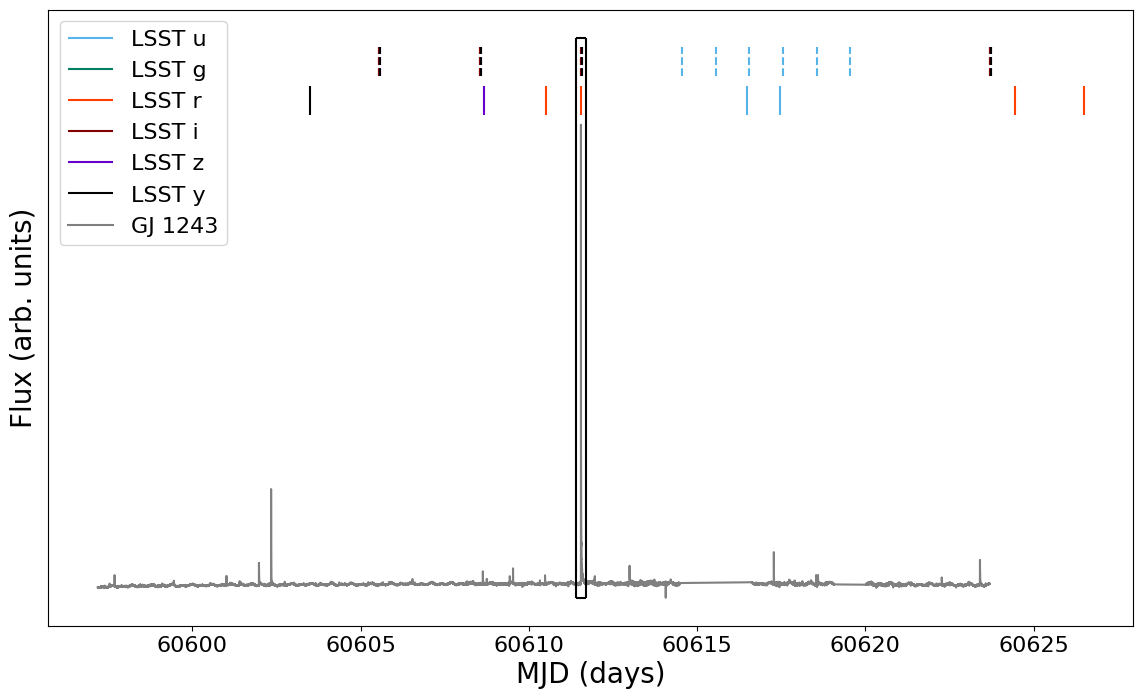

In [41]:
fig, ax = plt.subplots(1, figsize=(14,8))
ddftimes = []
wfdtimes = []

for i, filter in enumerate(plot_filter_labels):

    wfdtime = wfdobj[wfdobj['passband'] == i]['mjd'].where((wfdobj['mjd'] > midpt - (lc.time.bkjd.max() - lc.time.bkjd.min())/2) * (wfdobj['mjd'] < midpt + (lc.time.bkjd.max() - lc.time.bkjd.min())/2))
    ddftime = ddfobj[ddfobj['passband'] == i]['mjd'].where((ddfobj['mjd'] > midpt - (lc.time.bkjd.max() - lc.time.bkjd.min())/2) * (ddfobj['mjd'] < midpt + (lc.time.bkjd.max() - lc.time.bkjd.min())/2))
    ddftimes.append(ddftime.values)
    wfdtimes.append(wfdtime.values)
    ax.set_yticks([])

n = []
for t in wfdtimes:
    n.append(np.nanmin(t))

m = []
for t in ddftimes:
    m.append(np.nanmin(t))

box_edges = np.array([60611.4, 60611.7])

ddfshift = box_edges.mean() - ddftimes[2][~np.isnan(ddftimes[2])][2]
wfdshift = box_edges.mean() - wfdtimes[2][~np.isnan(wfdtimes[2])][1]

for i, filter in enumerate(plot_filter_labels):
    wfdtime = wfdobj[wfdobj['passband'] == i]['mjd'].where((wfdobj['mjd'] > midpt - (lc.time.bkjd.max() - lc.time.bkjd.min())/2) * (wfdobj['mjd'] < midpt + (lc.time.bkjd.max() - lc.time.bkjd.min())/2))
    ddftime = ddfobj[ddfobj['passband'] == i]['mjd'].where((ddfobj['mjd'] > midpt - (lc.time.bkjd.max() - lc.time.bkjd.min())/2) * (ddfobj['mjd'] < midpt + (lc.time.bkjd.max() - lc.time.bkjd.min())/2))
    ax.vlines(wfdtime + wfdshift, lc.flux.max().value + 10000, lc.flux.max().value + 40000, color=plot_filter_colors[filter], label='LSST {}'.format(filter))
    ax.vlines(ddftime + ddfshift, lc.flux.max().value + 50000, lc.flux.max().value + 80000, color=plot_filter_colors[filter], ls='--')

ax.plot(lc.time.mjd + (box_edges.mean() - lc.time.mjd[lc.flux == lc.flux.max()]), lc.flux, c='grey', label='GJ 1243')
ax.hlines([lc.flux.min().value, lc.flux.max().value + 90000], box_edges[0], box_edges[1], color='k')
ax.vlines([box_edges[0], box_edges[1]], lc.flux.min().value, lc.flux.max().value + 90000, color='k')
ax.set_xlabel('MJD (days)', fontsize=20)
ax.set_ylabel(r'Flux (arb. units)', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.legend(loc='upper left', fontsize=16)

plt.savefig('/Users/riley/Desktop/RAFTS/Figures/candencefig.png', dpi=600, bbox_inches='tight')

/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/3971650208.py:15: RuntimeWarning: All-NaN slice encountered
  n.append(np.nanmin(t))
/Users/riley/Desktop/RAFTS/venv/lib/python3.9/site-packages/matplotlib/axes/_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/var/folders/5t/bkx9p2011s7_gqm1hsnvvkqm0000gn/T/ipykernel_16096/3971650208.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array([60611.4 , 60611.45, 60611.5 , 60611.55, 60611.6 , 60611.65,


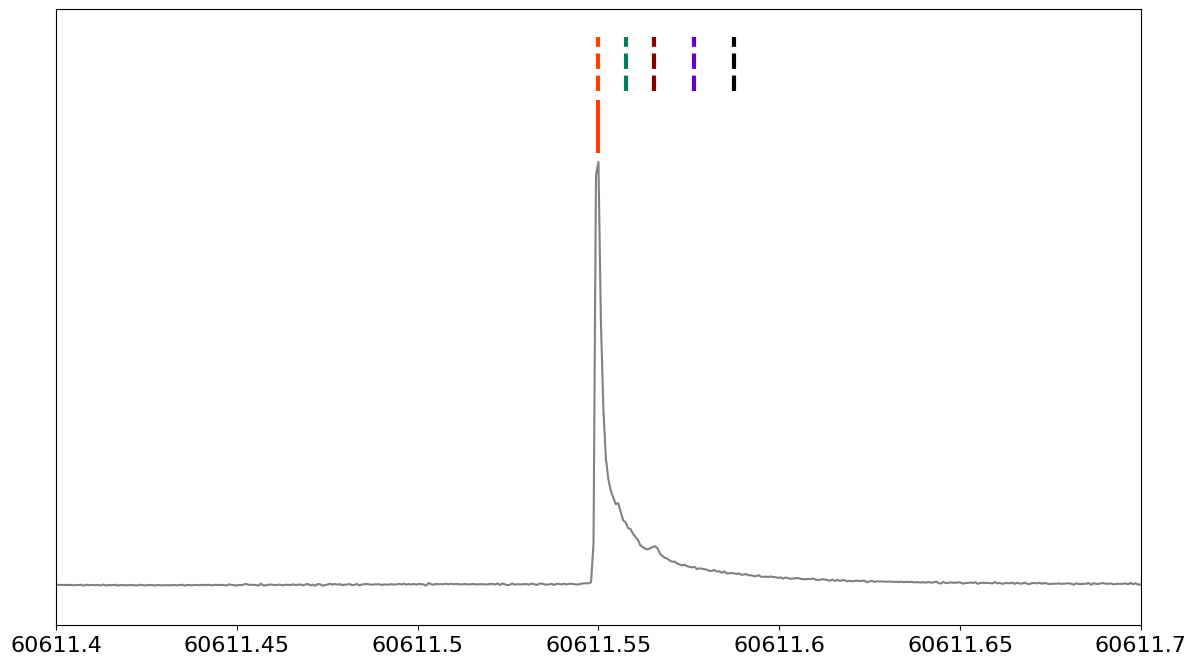

In [62]:
fig, ax = plt.subplots(1, figsize=(14,8))
ddftimes = []
wfdtimes = []

for i, filter in enumerate(plot_filter_labels):

    wfdtime = wfdobj[wfdobj['passband'] == i]['mjd'].where((wfdobj['mjd'] > midpt - (lc.time.bkjd.max() - lc.time.bkjd.min())/2) * (wfdobj['mjd'] < midpt + (lc.time.bkjd.max() - lc.time.bkjd.min())/2))
    ddftime = ddfobj[ddfobj['passband'] == i]['mjd'].where((ddfobj['mjd'] > midpt - (lc.time.bkjd.max() - lc.time.bkjd.min())/2) * (ddfobj['mjd'] < midpt + (lc.time.bkjd.max() - lc.time.bkjd.min())/2))
    ddftimes.append(ddftime.values)
    wfdtimes.append(wfdtime.values)
    ax.set_yticks([])

n = []
for t in wfdtimes:
    n.append(np.nanmin(t))

m = []
for t in ddftimes:
    m.append(np.nanmin(t))

ddfshift = box_edges.mean() - ddftimes[2][~np.isnan(ddftimes[2])][2]
wfdshift = box_edges.mean() - wfdtimes[2][~np.isnan(wfdtimes[2])][0]

for i, filter in enumerate(plot_filter_labels):
    wfdtime = wfdobj[wfdobj['passband'] == i]['mjd'].where((wfdobj['mjd'] > midpt - (lc.time.bkjd.max() - lc.time.bkjd.min())/2) * (wfdobj['mjd'] < midpt + (lc.time.bkjd.max() - lc.time.bkjd.min())/2))
    ddftime = ddfobj[ddfobj['passband'] == i]['mjd'].where((ddfobj['mjd'] > midpt - (lc.time.bkjd.max() - lc.time.bkjd.min())/2) * (ddfobj['mjd'] < midpt + (lc.time.bkjd.max() - lc.time.bkjd.min())/2))
    ax.vlines(wfdtime + wfdshift, lc.flux.max().value + 10000, lc.flux.max().value + 70000, color=plot_filter_colors[filter], lw=3, label='LSST {}'.format(filter))
    ax.vlines(ddftime + ddfshift, lc.flux.max().value + 80000, lc.flux.max().value + 140000, color=plot_filter_colors[filter], lw=3, ls='--')

ax.plot(lc.time.mjd + (box_edges.mean() - lc.time.mjd[lc.flux == lc.flux.max()]), lc.flux, c='grey', label='GJ 1243')

ax.set_xlim(box_edges)
ax.ticklabel_format(axis='x', style='plain')
ax.set_xticklabels(np.array([60611.4 , 60611.45, 60611.5 , 60611.55, 60611.6 , 60611.65,
       60611.7 ]), fontsize=16)

plt.savefig('/Users/riley/Desktop/RAFTS/Figures/candencefig2.png', dpi=600, bbox_inches='tight')

In [57]:
np.round(ax.get_xticklabels()., decimals=2)

AttributeError: 'list' object has no attribute 'values'

In [58]:
ax.get_xticks()

array([60611.4 , 60611.45, 60611.5 , 60611.55, 60611.6 , 60611.65,
       60611.7 ])